In [7]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Flipping Out

In [8]:
def flip_coin():
    return random.randint(1,2)

In [9]:

def flip_multiple(n=16):
    heads = 0
    tails = 0
    num_of_flips = 0
    list_of_flips = []
    for i in range(2**n):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        else:    
            tails += 1
        for i in range(n):
            if num_of_flips == 2**i:
                list_of_flips.append((heads, tails))
    return list_of_flips

flip_multiple()

[(1, 0),
 (2, 0),
 (4, 0),
 (6, 2),
 (11, 5),
 (18, 14),
 (33, 31),
 (67, 61),
 (142, 114),
 (276, 236),
 (539, 485),
 (1091, 957),
 (2086, 2010),
 (4148, 4044),
 (8279, 8105),
 (16463, 16305)]

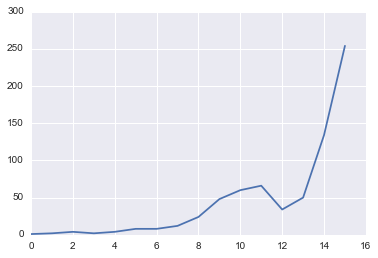

In [15]:
differences = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    differences.append(math.fabs(heads - tails))

plt.plot(differences)
plt.show()